In [1]:
import numpy as np
import json
import cv2
import pickle
import torch
from skimage import io
import matplotlib.pyplot as plt

from utils.image_utils import *

In [2]:
# test_image = io.imread('tests/test_image.jpg')
test_image = io.imread('/home/dawars/datasets/11k/Raw/Hand_0000187.jpg')

In [3]:
# with open('/home/dawars/datasets/11k/11k_joints_train.pkl', 'rb') as f:
#     joint_data = pickle.load(f)
# joints = np.array(joint_data[0]['joints'])
with open('/home/dawars/datasets/11k/1st_pass/Hand_0000187.jpg.right.json') as f:
    joints = np.array(json.load(f)[0])

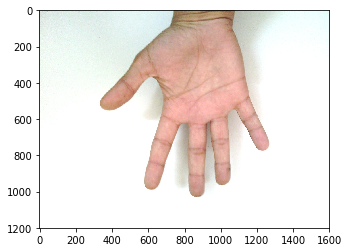

In [4]:
plt.imshow(test_image)

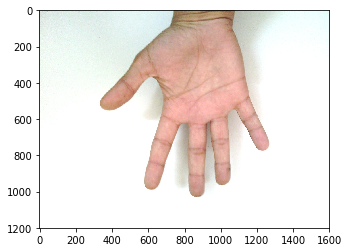

In [5]:
normalized_img = normalize_image(test_image)  # [-1, +1]
plt.imshow(normalized_img.astype(np.float) / 2 + 0.5)

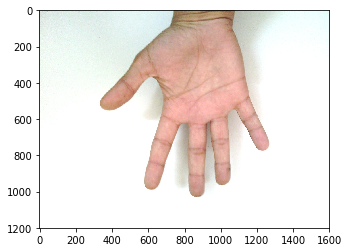

In [6]:
denormalized_img = denormalize_image(normalized_img) # [0, 255]
plt.imshow(denormalized_img)

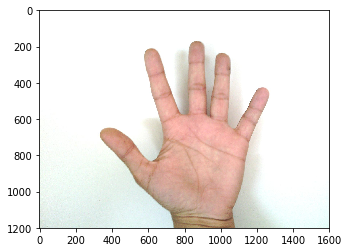

In [7]:
plt.imshow(flip_image_horizontal(test_image))

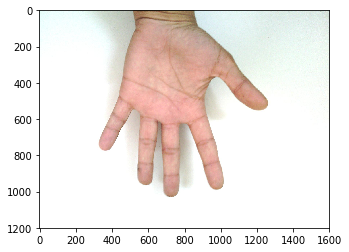

In [8]:
plt.imshow(flip_image_vertical(test_image))

In [9]:
joints # (x, y, certinty)

array([[8.91304321e+02, 8.26086960e+01, 5.58729649e-01],
       [7.52173889e+02, 1.95652176e+02, 6.99187577e-01],
       [6.04347839e+02, 2.95652161e+02, 8.30980837e-01],
       [4.78260864e+02, 4.34782593e+02, 8.86143267e-01],
       [3.65217377e+02, 5.39130432e+02, 9.15132523e-01],
       [7.52173889e+02, 5.04347809e+02, 8.11715245e-01],
       [6.86956482e+02, 7.21739136e+02, 9.44526315e-01],
       [6.47826050e+02, 8.47826050e+02, 9.37925458e-01],
       [6.17391296e+02, 9.86956482e+02, 8.82838249e-01],
       [8.82608704e+02, 5.13043457e+02, 9.32981074e-01],
       [8.78260864e+02, 7.56521729e+02, 8.39825630e-01],
       [8.65217346e+02, 9.00000000e+02, 8.14006567e-01],
       [8.73913025e+02, 1.02173914e+03, 7.66180277e-01],
       [9.91304321e+02, 5.00000000e+02, 8.42170417e-01],
       [1.00869562e+03, 7.17391296e+02, 9.54891324e-01],
       [1.01739130e+03, 8.47826050e+02, 9.61048424e-01],
       [1.02173914e+03, 9.56521729e+02, 9.46372330e-01],
       [1.09565210e+03, 4.56521

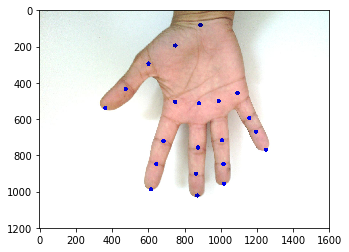

In [10]:
overlay = draw_joints(test_image, joints, color=(0,0,255))
plt.imshow(overlay)

In [11]:
test_image.shape # HWC -> CHW

(1200, 1600, 3)

In [12]:
chw = hwc2chw(test_image)
chw.shape

(3, 1200, 1600)

In [13]:
box = get_bounding_box(joints)
box

((265, -17), (1352, 1121))

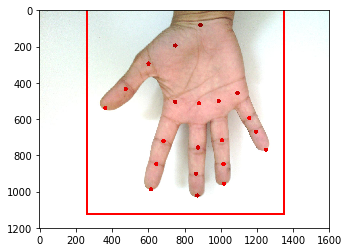

In [14]:
bb = cv2.rectangle(draw_joints(test_image.copy(), joints), *box, (255,0,0), 10)
plt.imshow(bb)

In [15]:
rect = get_bounding_rect(test_image, joints)
rect

((289, 81), (1327, 1119))

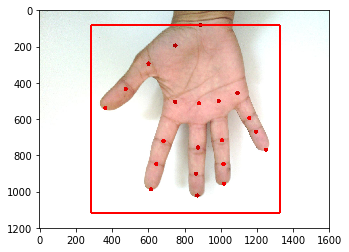

In [16]:
bb = cv2.rectangle(draw_joints(test_image.copy(), joints), *rect, (255,0,0), 10)
plt.imshow(bb)

In [17]:
cropped, kps = crop_img(test_image, joints)
cropped.shape

(1039, 1039, 3)

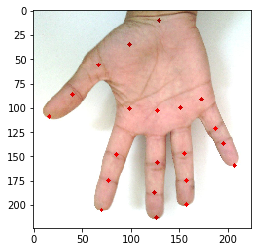

In [18]:
resized, kps_ = resize_image(cropped, kps)
plt.imshow(draw_joints(resized, kps_))

In [19]:
resized.shape # HWC

(224, 224, 3)

In [20]:
cat = concat_images([resized, draw_joints(resized, kps_), resized])

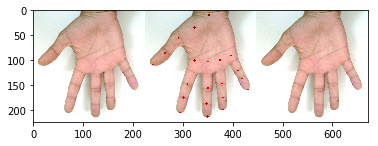

In [21]:
plt.imshow(cat)